In [1]:
from google.colab import files

uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [0]:
import pandas as pd

df = pd.read_csv('fashion-mnist_train.csv')
test =  pd.read_csv('fashion-mnist_test.csv')

In [0]:
from sklearn.preprocessing import label_binarize

y=df['label']
X=df.drop('label', axis=1)
X=X/255

y_test=test['label']
X_test=test.drop('label', axis=1)
X_test=X_test/255

In [5]:

import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


model = XGBClassifier(max_depth=4, n_estimators=200)
eval_set = [(X, y), (X_test, y_test)]
model.fit(X, y, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.218617	validation_0-mlogloss:2.0081	validation_1-merror:0.2247	validation_1-mlogloss:2.01188
[1]	validation_0-merror:0.198267	validation_0-mlogloss:1.80367	validation_1-merror:0.2074	validation_1-mlogloss:1.81026
[2]	validation_0-merror:0.1918	validation_0-mlogloss:1.64666	validation_1-merror:0.2019	validation_1-mlogloss:1.65517
[3]	validation_0-merror:0.186533	validation_0-mlogloss:1.5177	validation_1-merror:0.1978	validation_1-mlogloss:1.52751
[4]	validation_0-merror:0.183633	validation_0-mlogloss:1.40955	validation_1-merror:0.1918	validation_1-mlogloss:1.42073
[5]	validation_0-merror:0.1813	validation_0-mlogloss:1.31756	validation_1-merror:0.1916	validation_1-mlogloss:1.32992
[6]	validation_0-merror:0.1783	validation_0-mlogloss:1.23631	validation_1-merror:0.1892	validation_1-mlogloss:1.24979
[7]	validation_0-merror:0.176083	validation_0-mlogloss:1.16536	validation_1-merror:0.1854	validation_1-mlogloss:1.17989
[8]	validation_0-merror:0.1745	validation_0-mlog

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [6]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

Accuracy: 0.8968


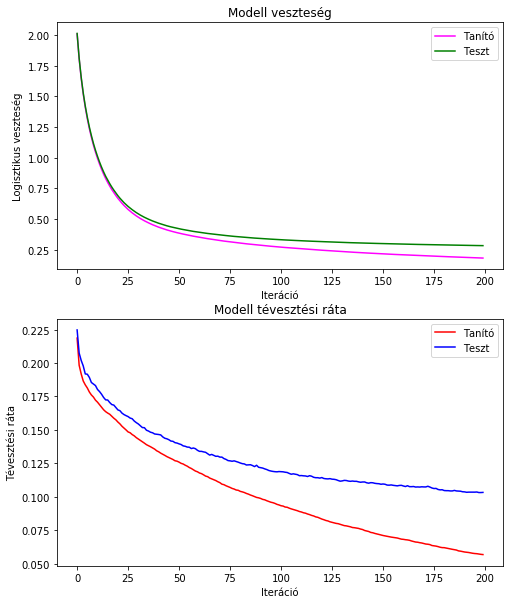

In [13]:
fig, (ax, ax1) = plt.subplots(2,1, figsize=(8,10))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Tanító', color='magenta')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Teszt', color='green')
ax.legend()
ax.set_ylabel('Logisztikus veszteség')
ax.set_xlabel('Iteráció')
ax.set_title('Modell veszteség')

ax1.plot(x_axis, results['validation_0']['merror'], label='Tanító', color='red')
ax1.plot(x_axis, results['validation_1']['merror'], label='Teszt', color='blue')
ax1.legend()
ax1.set_ylabel('Tévesztési ráta')
ax1.set_xlabel('Iteráció')
ax1.set_title('Modell tévesztési ráta')
plt.show()

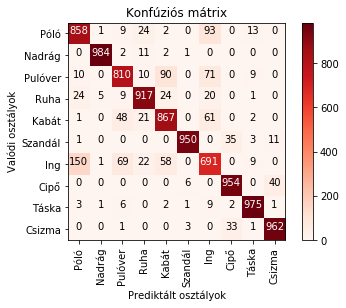

In [15]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import itertools

classes = {0: 'Póló',1: 'Nadrág',2: 'Pulóver',3: 'Ruha',4: 'Kabát',5: 'Szandál',6: 'Ing',7: 'Cipő',8: 'Táska',9: 'Csizma'}
num_classes         = len(classes)
classes_fashion     = ['Póló','Nadrág','Pulóver','Ruha','Kabát','Szandál','Ing','Cipő','Táska','Csizma']


cm=confusion_matrix(y_test, predictions)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Konfúziós mátrix')
tick_marks = np.arange(len(classes_fashion))
plt.xticks(tick_marks, classes_fashion, rotation=90)
plt.yticks(tick_marks, classes_fashion)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Valódi osztályok')
plt.xlabel('Prediktált osztályok')
plt.colorbar()
plt.show()